In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series,DataFrame
from lmfit import Model
from numpy import exp

In [2]:
#Define logistic model function
def logistic(t,A,mu,lamb):
    y = A/(1+exp((4*mu/A)*(lamb-t)+2))
    return y

In [3]:
#Define Gompertz model function
def gompertz(t,A,mu,lamb):
    y = A*exp(-exp(mu*exp(1)/A*(lamb-t)+1))
    return y

In [4]:
#Initiate models
log_mod=Model(logistic)
gomp_mod=Model(gompertz)

In [5]:
#Import ART coverage data
df = pd.read_excel('C:\\Users\Ben\Documents\Harvard Files\Research\ART Paper\ART_Coverage.xlsx',header=0)

In [6]:
#Initiate dictionary to store model results
gomp_dict={}

In [7]:
#Set time values centered around 2000
t=np.asarray(df.Year-2000)

In [8]:
#Get list of country codes
countries=np.asarray(df.columns.drop('Year'))

In [9]:
### Iterate Gompertz model build for each country
for country in countries:
    ### Select coverage values
    y = np.asarray(df[country])
    ### Set parameter hints
    #A - Restrict coverage between 0 and 100%, guess current maximum value
    gomp_mod.set_param_hint('A',value=y.max(),min=0,max=100)
    #Mu - Rate of change, guess max difference
    gomp_mod.set_param_hint('mu',value=df[country].diff(1).max())
    #Lambda - Lag time, guess 3
    gomp_mod.set_param_hint('lamb',value=3)
    ### Fit model
    result = gomp_mod.fit(y,t=t,verbose=False)
    ### Store fitted model in dictionary
    gomp_dict[country] = result

In [10]:
### Initialize dictionary to store model results
log_dict ={}

In [11]:
### Iterate Logistic model build for each country
for country in countries:
    ### Select coverage values
    y = np.asarray(df[country])
    ### Set parameter hints
    #A - Restrict coverage between 0 and 100%, guess current maximum value
    log_mod.set_param_hint('A',value=y.max(),min=0,max=100)
    #Mu - Rate of change, guess max difference
    log_mod.set_param_hint('mu',value=df[country].diff(1).max())
    #Lambda - Lag time, guess 3
    log_mod.set_param_hint('lamb',value=3)
    ### Fit model
    result = log_mod.fit(y,t=t,verbose=False)
    ### Store fitted model in dictionary
    log_dict[country] = result

In [12]:
#Store results in DataFrame
#Columns
cols=['Country','A','A_lo','A_hi','mu','mu_lo','mu_hi','lamb','lamb_lo','lamb_hi','BIC']
gomp_df=DataFrame(columns=cols)
log_df=DataFrame(columns=cols)

In [13]:
t2=np.asarray(range(0,26))

In [14]:
countries = ['BWA','GAB','RWA','KEN','UGA','ZAF']

In [15]:
import itertools

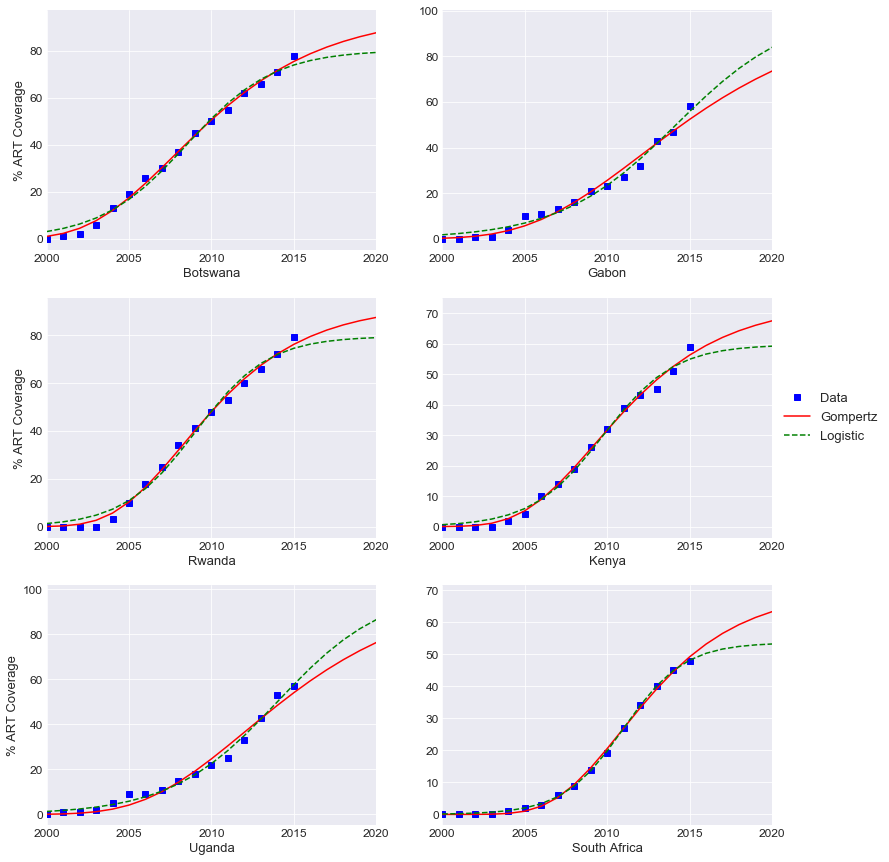

In [19]:
f, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2, sharex='none',figsize=(13,15))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
sns.set_style('darkgrid')

for ax, country in zip(axes,countries):
    ax.plot(t,df[country],'bs')
    ax.plot(t2,gomp_dict[country].eval(t=t2),'r-')
    ax.plot(t2,log_dict[country].eval(t=t2),'g--')
    ax.set_xlim([0,20])
    ax.set
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end+1, 5))
    ax.xaxis.set_ticklabels(['2000','2005','2010','2015','2020'],fontsize=12)
    plt.rc('ytick',labelsize=12)

ax1.set_ylabel('% ART Coverage',fontsize=13)
ax3.set_ylabel('% ART Coverage',fontsize=13)
ax5.set_ylabel('% ART Coverage',fontsize=13)
    
ax1.set_xlabel('Botswana',fontsize=13)
ax2.set_xlabel('Gabon',fontsize=13)
ax3.set_xlabel('Rwanda',fontsize=13)
ax4.set_xlabel('Kenya',fontsize=13)
ax5.set_xlabel('Uganda',fontsize=13)
ax6.set_xlabel('South Africa',fontsize=13)
ax4.legend(['Data','Gompertz','Logistic'],loc='center left', bbox_to_anchor=(1, 0.5),fontsize=13)
plt.savefig('C:/Users/Ben/Documents/Harvard Files/Research/ART Paper/country_regressions_v2.png',
            bbox_inches='tight',pad_inches=0.5)
plt.show()

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
#Put Gompertz results in DataFrame
for country in gomp_dict:
    dic=gomp_dict[country].best_values
    dic['Country']=country
    dic['BIC']=gomp_dict[country].bic
    #Confidence intervals
    cis=gomp_dict[country].conf_interval()
    #A
    dic['A_lo']=cis['A'][1][1]
    dic['A_hi']=cis['A'][5][1]
    #Mu
    dic['mu_lo']=cis['mu'][1][1]
    dic['mu_hi']=cis['mu'][5][1]
    #Lambda
    dic['lamb_lo']=cis['lamb'][1][1]
    dic['lamb_hi']=cis['lamb'][5][1]
    #Append to DataFrame
    gomp_df=gomp_df.append(dic,ignore_index=True)        

In [148]:
#Put logistic results in DataFrame
for country in log_dict:
    dic=log_dict[country].best_values
    dic['Country']=country
    dic['BIC']=log_dict[country].bic
    #Confidence intervals
    cis=log_dict[country].conf_interval()
    #A
    dic['A_lo']=cis['A'][1][1]
    dic['A_hi']=cis['A'][5][1]
    #Mu
    dic['mu_lo']=cis['mu'][1][1]
    dic['mu_hi']=cis['mu'][5][1]
    #Lambda
    dic['lamb_lo']=cis['lamb'][1][1]
    dic['lamb_hi']=cis['lamb'][5][1]
    #Append to DataFrame
    log_df=log_df.append(dic,ignore_index=True)    

In [206]:
#Observed delay in program scale-up - in years since 2000
delay=df.drop('Year',axis=1).where(df==0).count().to_frame(name='delay_obs')

In [207]:
#Current coverage levels
coverage=df.drop('Year',axis=1).max().to_frame(name='coverage')

In [208]:
#Maximum year-to-year change
max_change=df.drop('Year',axis=1).diff(1).max().to_frame('max_change')

In [209]:
#Average scale-up per year - Current coverage divided by years with coverage
yrs_covered=df.drop('Year',axis=1).where(df>0).count().to_frame(name='yrs_covered')
coverage=pd.merge(coverage,yrs_covered,left_index=True,right_index=True)
coverage['avg_change']=coverage.coverage/coverage.yrs_covered

In [211]:
coverage=pd.merge(coverage,max_change,left_index=True,right_index=True,sort=True)

In [213]:
#Merge rates of scale-up
mu_cols=['Country','mu','mu_lo','mu_hi','BIC']
rates=pd.merge(gomp_df[mu_cols],log_df[mu_cols],left_on='Country',right_on='Country',
               sort=True,suffixes=('_gomp','_log'))

In [214]:
#Add observed data
rates=pd.merge(rates,coverage[['max_change','avg_change']],left_on='Country',right_index=True)

In [216]:
#Merge coverage levels
a_cols=['Country','A','A_lo','A_hi','BIC']
a=pd.merge(gomp_df[a_cols],log_df[a_cols],left_on='Country',right_on='Country',sort=True,suffixes=('_gomp','_log'))

In [221]:
#Add observed data
a=pd.merge(a,coverage[['coverage']],left_on='Country',right_index=True)

In [222]:
#Merge time lags, delays
lamb_cols=['Country','lamb','lamb_lo','lamb_hi','BIC']
lags=pd.merge(gomp_df[lamb_cols],log_df[lamb_cols],left_on='Country',right_on='Country',
              sort=True,suffixes=('_gomp','_log'))

In [223]:
#Add observed data
lags=pd.merge(lags,delay[['delay_obs']],left_on='Country',right_index=True)

In [232]:
#Add difference in BIC
for d in [a,lags,rates]:
    d['delta_BIC']=d.BIC_gomp-d.BIC_log

In [243]:
#Import population data
pop=pd.read_excel('C:\\Users\Ben\Documents\Harvard Files\Research\ART Paper\Total_Population_2015.xlsx',header=0)

In [252]:
#Keep countries with population greater than 1 MM
pop=pop[pop['Population']>=1000000]

In [266]:
#Restrict dataframes to countries less than 1 MM
a=a[a['Country'].isin(pop['Country Code'])]
lags=lags[lags['Country'].isin(pop['Country Code'])]
rates=rates[rates['Country'].isin(pop['Country Code'])]

In [284]:
#Merge with country names
for d in [a,lags,rates]:
    d=pd.merge(d,pop,how='left',left_on='Country',right_on='Country Code').drop(['Country Code','Population'],axis=1)

In [285]:
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:\\Users\Ben\Documents\Harvard Files\Research\ART Paper\Final_Output.xlsx',
                        engine='xlsxwriter')
a.to_excel(writer,sheet_name='A')
lags.to_excel(writer,sheet_name='Lambda')
rates.to_excel(writer,sheet_name='Mu')
writer.save()